<a href="https://colab.research.google.com/github/Sujan-Sawant/Business-Case-Studies/blob/main/Jamboree_Education_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

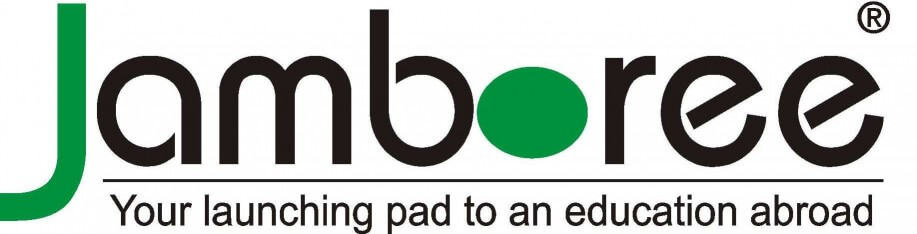

##<font color = Green>**Context** </font>

**Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.**


##<font color = red>**Business Problem:** </font>
- **Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.**

##<font color = Green>**Dataset**</font>
**Column Profiling:**

1. **Serial No:** (Unique row ID)
2. **GRE Scores:** (out of 340)
3. **TOEFL Scores:** (out of 120)
4. **University Rating:** (out of 5)
5. **Statement of Purpose and Letter of Recommendation Strength:** (out of 5)
6. **Undergraduate GPA:** (out of 10)
7. **Research Experience:** (either 0 or 1)
8. **Chance of Admit:** (ranging from 0 to 1)

Concept Used:

- **Exploratory Data Analysis**
- **Linear Regression**

## <font color = Green>**Solution Approach:** </font>

- **Imported the dataset and performed standard exploratory data analysis (EDA), examining the structure and characteristics of the data.**
- **Removed any unique row identifiers to ensure the model doesn't make inferences based on row numbers.**
- **Conducted both non-graphical and graphical analysis to gain insights into the variables, particularly focusing on the distribution of variables for graduate applicants.**
- **After confirming that a diverse range of students with varying merits were applying to the university, explored the relationships between different factors influencing graduate admissions.**
- **Checked correlation among independent variables and examined how they interacted with each other.**
- **Apply Linear Regression and explain the results.**
- **I tested the assumptions of linear regression, including:**
 - **Multicollinearity check by VIF score**
 - **Mean of residuals**
 - **Linearity of variables (no pattern in residual plot)**
 - **Test for Homoscedasticity**
 - **Normality of residuals**
- **Performed model evaluation using metrics such as MAE, RMSE, R², and Adjusted R².**
- **At the last, Provided the actionable insights and recommendations based on the findings.**


In [ ]:
# Importing the libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Downloding the data
!gdown 1nvak5WMgjGC6zcUyfMEWysvdDELlOqDr

Downloading...
From: https://drive.google.com/uc?id=1nvak5WMgjGC6zcUyfMEWysvdDELlOqDr
To: /content/Jamboree_Admission.csv
100% 16.2k/16.2k [00:00<00:00, 32.0MB/s]


In [ ]:
# Reading or Loading a CSV file into a pandas DataFrame.
df = pd.read_csv("/content/Jamboree_Admission.csv")

In [ ]:
# Viewing the first few rows of a DataFrame.
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# Viewing the last few rows of a DataFrame.
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


## Exploratory Data Analysis and Data Cleaning (EDA)

In [ ]:
# Retrieving the dimensions of a DataFrame (Rows, Columns).

df.shape

(500, 9)

In [ ]:
# Retrieving the column labels (names) of a DataFrame .

df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

*Since the "Serial no" column does not provide valuable information and is not useful for the model, we will drop it to improve accuracy.*

In [ ]:
# Drop the unneccesary colum
df.drop(columns=["Serial No."], inplace=True)

In [ ]:
# Display the number of missing values (NaN) in each column of the DataFrame

df.isnull().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [ ]:
# Retrieving statistics of the numerical columns in a DataFrame.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [ ]:
# Retrieving summary of a DataFrame.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [ ]:
# Display the data type of each column in a DataFrame

df.dtypes

,0
GRE Score,int64
TOEFL Score,int64
University Rating,int64
SOP,float64
LOR,float64
CGPA,float64
Research,int64
Chance of Admit,float64


**The dataset has been cleaned, and there are no null values present, allowing us to proceed directly with the analysis.**

## <font color = red> **Outliers Treatment**

### Visual Analysis for Outliers




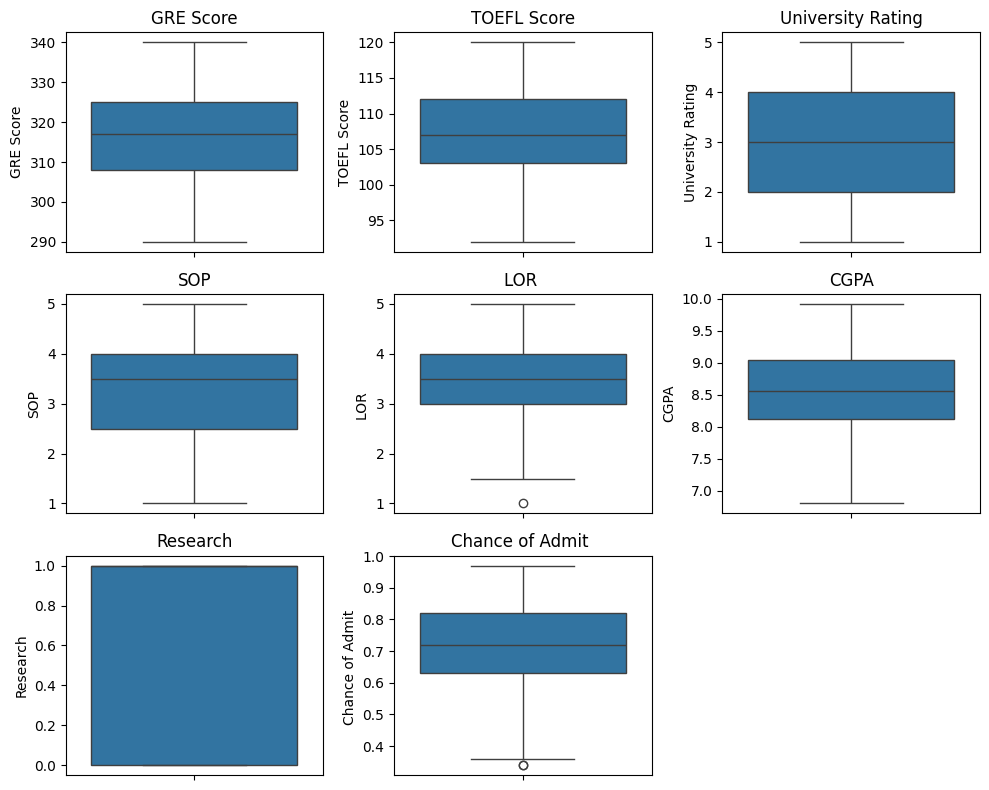

In [ ]:
numeric_columns = df.select_dtypes(include=["number"])

plt.figure(figsize=(10,8))
for i,col in enumerate (numeric_columns.columns):
  plt.subplot(3,3,i+1)
  sns.boxplot(df[col])
  plt.title(col)
plt.tight_layout()
plt.show()

There are no such outliers present in the data based on the plots; However, to ensure clarity, let's use the IQR method to identify any potential outliers.



In [ ]:
import pandas as pd

# Select only numerical columns
numeric_columns = df.select_dtypes(include=["number"])

def identify_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

outlier_counts = {}  # Dictionary to store outlier counts for each column

for col in numeric_columns.columns:
    outliers = identify_outliers(numeric_columns[col])
    outlier_counts[col] = len(outliers)

# Print the count of outliers for each numerical column
for col, count in outlier_counts.items():
    print(f"Count of outliers present in {col}: {count}")


Count of outliers present in GRE Score: 0
Count of outliers present in TOEFL Score: 0
Count of outliers present in University Rating: 0
Count of outliers present in SOP: 0
Count of outliers present in LOR : 1
Count of outliers present in CGPA: 0
Count of outliers present in Research: 0
Count of outliers present in Chance of Admit : 2


**<h2>Check correlation among independent variables using <font color="yellow">Heatmap</font> and <font color="yellow">Scatter Plot</font></h2>**


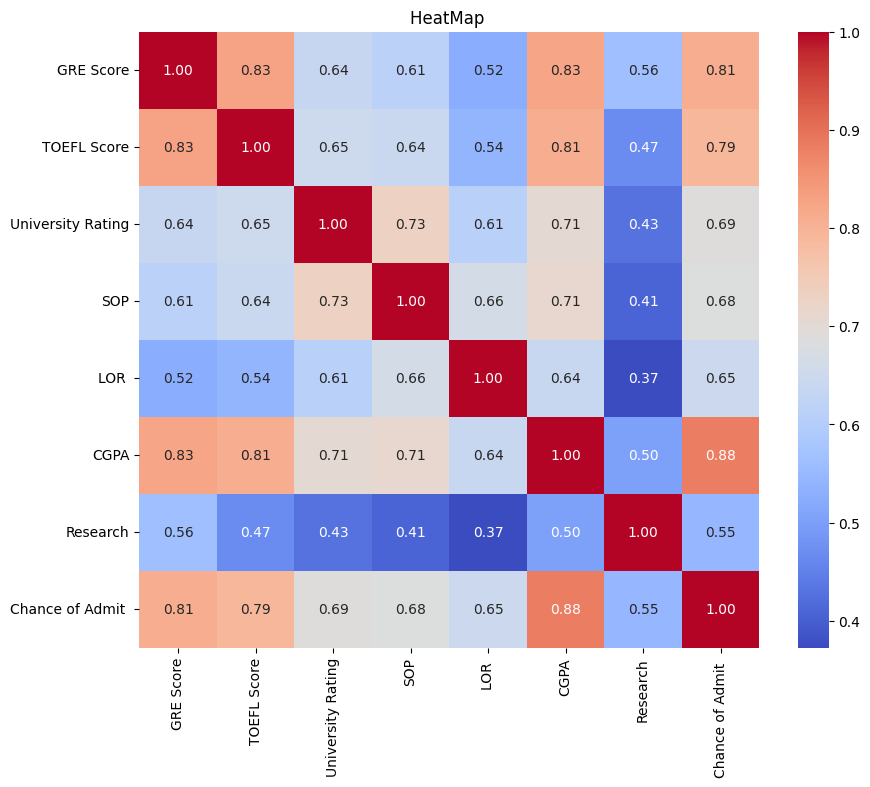

In [ ]:
plt.figure(figsize=(10,8))
correlation_matrix = df.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("HeatMap ")
plt.show()

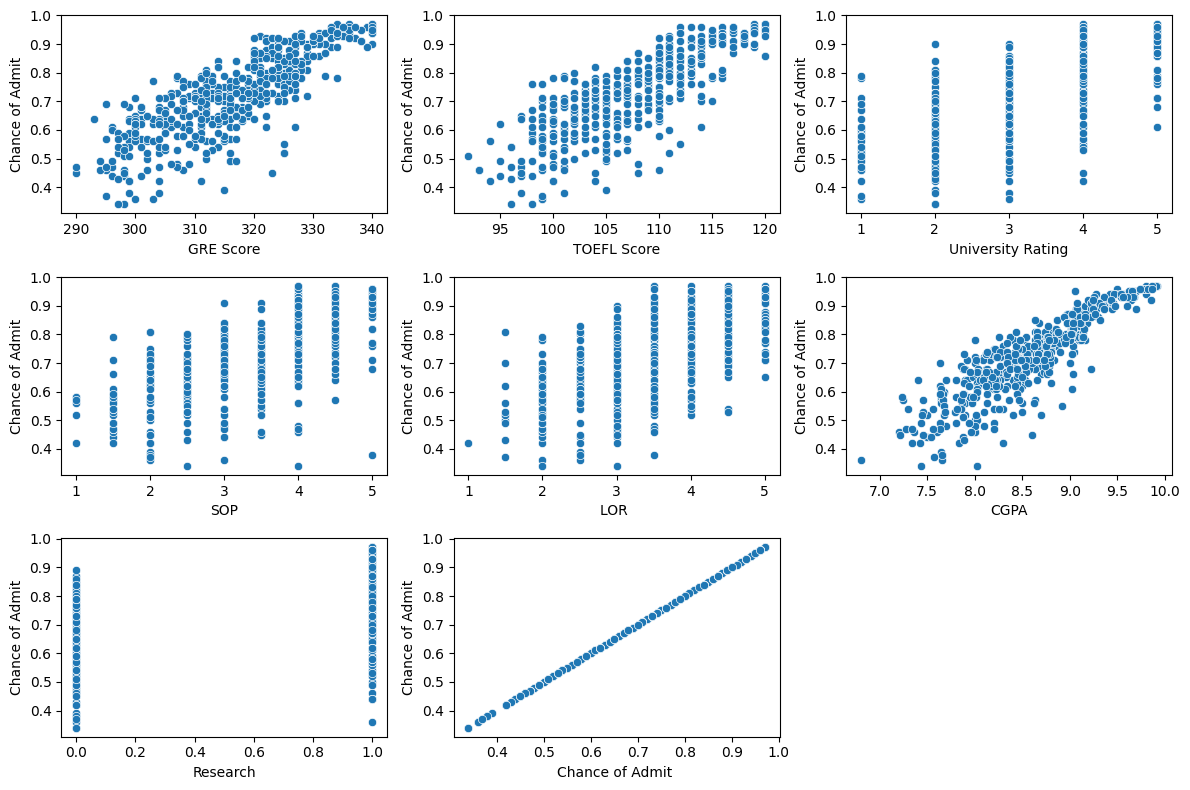

In [ ]:
plt.figure(figsize=(12,8))

# Target column
target_col = df["Chance of Admit "]

# Iterate over columns to create scatter plots
for i, col in enumerate(df.columns):
        plt.subplot(3,3,i+1)
        sns.scatterplot(x=df[col], y=target_col)
        plt.xlabel(col)
        plt.ylabel("Chance of Admit")
        plt.tight_layout()
plt.show()


In [ ]:
df.dtypes

,0
GRE Score,int64
TOEFL Score,int64
University Rating,int64
SOP,float64
LOR,float64
CGPA,float64
Research,int64
Chance of Admit,float64


In [ ]:
# Importing Necessary Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Split the data into Independent (X) and Dependent (y) Variables
y = df["Chance of Admit "]
X = df.drop(columns=["Chance of Admit "])
model = LinearRegression()

# Train-Test Split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the Data: Fit scaler only on training data and transform both train and test data
# y_pred = model.predict(X_test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on train, transform train
X_test_scaled = scaler.transform(X_test)  # Only transform test using the train scaler

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)




LinearRegression()

In [ ]:
# Predicting the outcomes for the test set
y_pred = model.predict(X_test_scaled)

# Calculating Mean Squared Error (MSE) and R-squared (R2) score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

weight_vectors = model.coef_
bias = model.intercept_

# Get weight vectors and bias
print(f"Weight Vectors (Wi): {weight_vectors}")
print(f"Bias (W0): {bias}")

# Output the performance metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) on Test Set: {r2}")

#  R² score on the training set:
train_r2 = model.score(X_train_scaled, y_train)
print(f"R-squared (R2) on Training Set: {train_r2}")

Weight Vectors (Wi): [0.02437518 0.02074582 0.003574   0.00151171 0.01397131 0.06878132
 0.01029245]
Bias (W0): 0.7240857142857143
Mean Squared Error (MSE): 0.0036342178012511036
R-squared (R2) on Test Set: 0.8256306039919491
R-squared (R2) on Training Set: 0.8181753126784597


In [ ]:
df.dtypes


###<font color = "yellow">**Feature Importance:**</font> Lets check which feature are most important to predict target variable

In [ ]:
imp = pd.DataFrame(list(zip(X_test.columns,np.abs(model.coef_))),
                   columns=['feature', 'coeff'])
imp = imp.sort_values(by = "coeff",ascending = False)
sns.barplot(x='feature', y='coeff', data=imp)
plt.xticks(rotation = 75)

## <font color = "Orange">**Inference**</font>

1. **Mean Squared Error (MSE): 0.0036**
  - **Interpretation:** The Mean Squared Error (MSE) measures the average squared difference between the actual and predicted values of the target variable.
  - A value of 0.0036 indicates that, on average, the model's predictions are quite close to the true values.This suggests that the model performs well in terms of making accurate predictions. A low MSE implies that the model's errors are small, which is a good sign.
2. **R-squared (R²) on Test Set: 0.8256**
  - **Interpretation**: The R-squared value indicates the proportion of the variance in the dependent variable that is explained by the independent variables in the model.
  - An R² of 0.8256 means that approximately 82.56% of the variability in the target variable (e.g., "Chance of Admit") is explained by the model.
  - This is a high R² value, indicating that the model has a good fit on the test set. It suggests that the model is successful in capturing the relationship between the independent variable(s) and the dependent variable.
3. **R-squared (R²) on Training Set: 0.8182**
  - **Interpretation:** The R² on the training set is 0.8182, which means that the model explains about 81.82% of the variability in the training data.
  - This is also a strong value and suggests that the model is performing well on the training data. The slight difference between the R² on the training set (0.8182) and the test set (0.8256) indicates that the model generalizes well to new, unseen data and isn't overfitting the training data.




### We can then interpret the coefficients as follows:

1. **CGPA (Cumulative Grade Point Average): Coefficient = 0.06878132**
  - For each unit increase in CGPA, the Chance of Admit increases by 0.0688. This is one of the highest coefficients, indicating that CGPA has a significant positive effect on the Chance of Admit. This makes sense since academic performance (CGPA) is often one of the most important factors in graduate admissions.

2. **GRE Score: Coefficient = 0.02437518**
  - For each unit increase in the GRE Score, the Chance of Admit increases by approximately 0.024. While the effect is positive, this coefficient is relatively small, meaning that GRE Score has a moderate impact on the admission chance.
3. **TOEFL Score: Coefficient = 0.02074582**
  - A unit increase in the TOEFL Score will increase the Chance of Admit by approximately 0.021. Like GRE Score, the impact of TOEFL Score is positive but modest compared to other features.
4. **LOR (Letter of Recommendation): Coefficient = 0.01397131**
  - A unit increase in the LOR increases the Chance of Admit by about 0.014. This coefficient shows that LOR is one of the more influential factors in the model, which is consistent with how important strong recommendations are in admission decisions.

5. **Research (Research Experience): Coefficient = 0.01029245**
  - Having research experience increases the Chance of Admit by 0.0103. The coefficient suggests that research experience has a small positive impact on the admission chance, but it might not be as significant as academic metrics like CGPA or LOR.

6. **University Rating: Coefficient = 0.003574**
  - The University Rating has a small positive effect on the Chance of Admit. For each unit increase in University Rating, the Chance of Admit increases by 0.0036. The relatively small value of this coefficient indicates that this feature has a lower impact compared to others.
7. **SOP (Statement of Purpose): Coefficient = 0.00151171**
  - Each unit increase in the SOP score increases the Chance of Admit by approximately 0.0015. This suggests that the Statement of Purpose has a small but positive influence on the admission probability.


### Let's create a model using a single independent variable and the dependent variable, and then visualize the predicted line to gain a clearer understanding of the relationship.

In [ ]:
X1=X[["CGPA"]]
X1_train = X_train[["CGPA"]]
X1_test = X_test[["CGPA"]]

In [ ]:
X1_train.head()

In [ ]:
model1 = LinearRegression()
model1.fit(X1_train, y_train)

In [ ]:
model1.coef_,model1.intercept_

In [ ]:
y_hat = model1.predict(X1)
fig = plt.figure()
plt.scatter(X1,y,label="data")
plt.scatter(X1,y_hat,color="orange",label="prediction")
plt.legend()
plt.show()

### Lets train Lasso and Ridge Regression

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
# Lasso Regression
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train_scaled, y_train)

# Predictions and Evaluation for Lasso Regression
y_pred_lasso = model_lasso.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression - MSE: {mse_lasso}, R2: {r2_lasso}")

Lasso Regression - MSE: 0.003816575917143393, R2: 0.8168810803628594


In [ ]:
# Ridge Regression
model_ridge = Ridge(alpha=1)  # You can adjust the alpha (regularization strength)
model_ridge.fit(X_train_scaled, y_train)

# Predictions and Evaluation for Ridge Regression
y_pred_ridge = model_ridge.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - MSE: {mse_ridge}, R2: {r2_ridge}")

Ridge Regression - MSE: 0.0036334707223449124, R2: 0.825666448760966


### visualize the predicted line to for Independent variable and Dependant variable gain a clearer understanding of the relationship.

In [ ]:
# Define a function to visualize each feature
def visualize_feature(feature_name):
    # Extract the feature for visualization

    X1 = X[[feature_name]]
    X1_train = X_train[[feature_name]]
    X1_test = X_test[[feature_name]]

    # Train a linear regression model on the single feature
    model2 = LinearRegression()
    model2.fit(X1_train, y_train)

    # Predict using the trained model
    y_hat = model2.predict(X1)

    # Plot the actual data vs. predictions
    plt.figure(figsize=(8, 6))
    plt.scatter(X1, y, label='Data', alpha=0.6)
    plt.scatter(X1, y_hat, color='orange', label='Prediction', alpha=0.8)
    plt.title(f"Visualization of Feature: {feature_name}")
    plt.xlabel(feature_name)
    plt.ylabel("Chance of Admit")
    plt.legend()
    plt.show()


for col in X.columns:
  visualize_feature(col)




### Statsmodel

In [ ]:
import statsmodels.api as sm

# Ensure that X_train_scaled is a DataFrame with proper column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Add a constant column (for intercept)
X_sm = sm.add_constant(X_train_scaled)

X_sm.index = y_train.index

# Fit the model
model3 = sm.OLS(y_train, X_sm)
results = model3.fit()

# Print the summary statistics of the model
print(results.summary())


### <font color = "Yellow"> **Inference from the above table**</font>

**Key Metrics to Evaluate Feature Importance:**
- **p-value:** This indicates the statistical significance of each feature. A low p-value (< 0.05) suggests that the feature is statistically significant and likely contributes to predicting the target variable.

 - **<font color = "green">Important Features: p-value < 0.05**</font>
 - **<font color = "red">Not Important Features: p-value ≥ 0.05**</font>

- **t-statistic:** The t-statistic measures the significance of the coefficient. A higher absolute t-value indicates that the feature has a stronger relationship with the target.

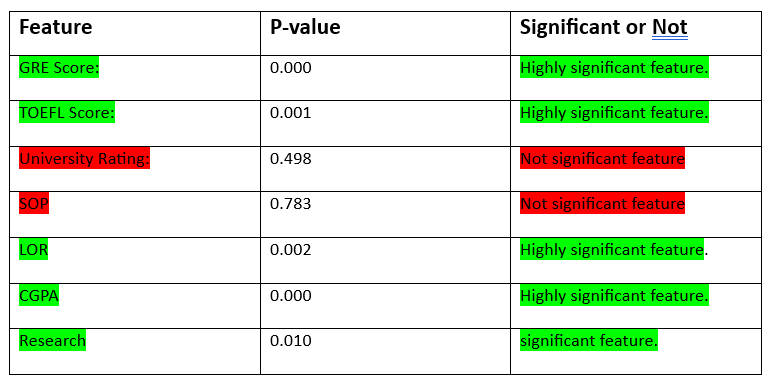




Inference:

1. **GRE Score:** (p-value = 0.000) has a very low p-value, indicating it is statistically significant for predicting Chance of Admit. Since its coefficient is also positive (0.0244), it suggests that higher GRE scores lead to a higher chance of admit.

2. **TOEFL Score:** (p-value = 0.001) is also statistically significant. A positive coefficient (0.0207) implies that higher TOEFL scores increase the chance of admit.

3. **University Rating:** (p-value = 0.498) has a high p-value (greater than 0.05), which suggests it is not significant in predicting the Chance of Admit. Even though it has a positive coefficient (0.0036), it does not seem to have a meaningful impact.

4. **SOP:** (p-value = 0.783) also has a high p-value, indicating that this feature does not have a significant impact on Chance of Admit.

5. **LOR:** (p-value = 0.002) has a low p-value and a positive coefficient (0.0140), suggesting it is a significant predictor. Stronger letters of recommendation increase the chance of admit.

6. **CGPA:** (p-value = 0.000) is highly significant, with a large positive coefficient (0.0688), meaning CGPA has a strong and positive relationship with Chance of Admit.

7. **Research:** (p-value = 0.010) is significant and indicates that having research experience increases the chance of admit.

### **Lets check assumptions of Liniear Regression:**










**1. Linearity:**
  - The relationship between the independent variables and the dependent variable is linear.

In [ ]:
# 1. Linearity: Check linearity by plotting residuals vs predicted values
residuals = y_test - y_pred

plt.figure(figsize=(10,6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals vs Predicted values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

- The slight curve in the predicted line suggests there might be some degree of non-linearity between the dependant and the independant variable.
- This could mean that the assumption of linearity is not fully satisfied.
However, the deviations are not extreme, so the model may still be usable.


**2. Independence of Errors:**

  - The residuals (errors) are independent of each other.

**3. Hetroscedasticity (Constant Variance of Errors):**
  - The variance of the errors should be constant across all values of the independent variable(s).

In [ ]:
sns.scatterplot(x=Y_hat,y=error)
plt.xlabel("predicted Chance of Admit")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")
plt.show()

- Based on the pattern, the assumption of homoscedasticity is likely violated

**4. Normality of Errors:**
  - The residuals should be normally distributed.

In [ ]:
# Ensure indices of y_train match X_train_scaled
y_train = y_train.reset_index(drop=True)
X_sm = sm.add_constant(X_train_scaled)

# Fit the OLS model
sm_model = sm.OLS(y_train, X_sm).fit()

# Predictions and residuals
Y_hat = sm_model.predict(X_sm)
error = y_train - Y_hat  # Residuals = Actual - Predicted

# Generate histogram of residuals
mu = error.mean()
std = error.std()
s = np.random.normal(mu, std, 1000)

sns.histplot(s, kde=True)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.show()


In [ ]:
import seaborn as sns

sns.histplot(s)
sns.histplot(error)
plt.xlabel("Chance of Admit")
plt.show()

- From the above visualization error as somewhat normally distributed
- This could mean that the assumption of normality of erro is not fully satisfied.

**5. No Multicollinearity:**

  - The independent variables should not be highly correlated with each other. High multicollinearity can make it difficult to assess the individual effect of each predictor.

In [ ]:
# No Multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X_t = pd.DataFrame(X_train_scaled, columns=X_train.columns)
vif["Features"] = X_t.columns
vif["VIF"] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif["VIF"] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

- Since the VIF Score is less than 5 so there is No Multicolinearity exist in the Variables
- Hence The Multicolinearity assumption is not violeted.